In [16]:
import sys
sys.path.append('D:\Proyectos Personales ML\Fraud detection\src\data\data_loader.py')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
import os
import sys

# El os.getcwd() va directamente con '..'
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

print("Directorio actual:", os.getcwd())
print("Directorio raíz:", root_dir)

sys.path.append(root_dir)

Directorio actual: d:\Proyectos Personales ML\Fraud detection\notebooks
Directorio raíz: d:\Proyectos Personales ML\Fraud detection


In [19]:
file_path = os.path.join(root_dir, 'data', 'raw', 'data2.csv')  # Reemplaza 'tu_archivo.csv' con el nombre real
df = pd.read_csv(file_path)

df.head(5)


,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [7]:
df.describe()

,Income,Credit_card_number,Security_code,Fraud
count,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600
std,28837.72928,1.257950e+18,1484.424959,0.500022
min,1.00000,6.040296e+10,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [12]:
df.isnull().sum()

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64

In [13]:
print("Distribución de Fraudes:")
print(df['Fraud'].value_counts(normalize=True) * 100)

Distribución de Fraudes:
Fraud
1    50.16
0    49.84
Name: proportion, dtype: float64


In [14]:
prof_fraud = pd.crosstab(df['Profession'], df['Fraud'], normalize='index') * 100
print("\nPorcentaje de fraudes por profesión:")
print(prof_fraud)


Porcentaje de fraudes por profesión:
Fraud               0          1
Profession                      
DOCTOR      47.943178  52.056822
ENGINEER    51.715686  48.284314
LAWYER      49.925529  50.074471


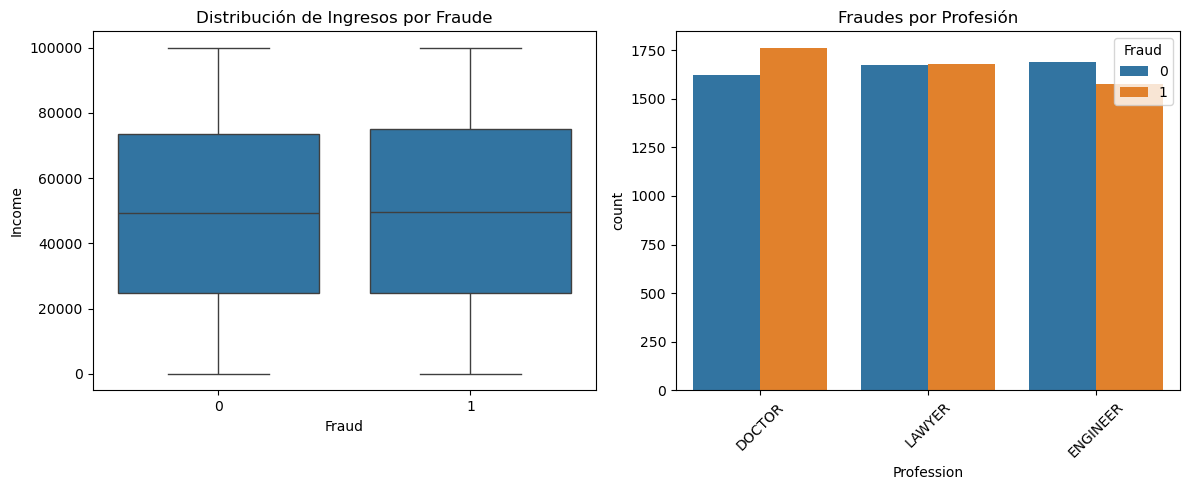

In [15]:
# 3. Visualizaciones
plt.figure(figsize=(12, 5))

# Distribución de ingresos por fraude
plt.subplot(1, 2, 1)
sns.boxplot(x='Fraud', y='Income', data=df)
plt.title('Distribución de Ingresos por Fraude')

# Fraudes por profesión
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Profession', hue='Fraud')
plt.title('Fraudes por Profesión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


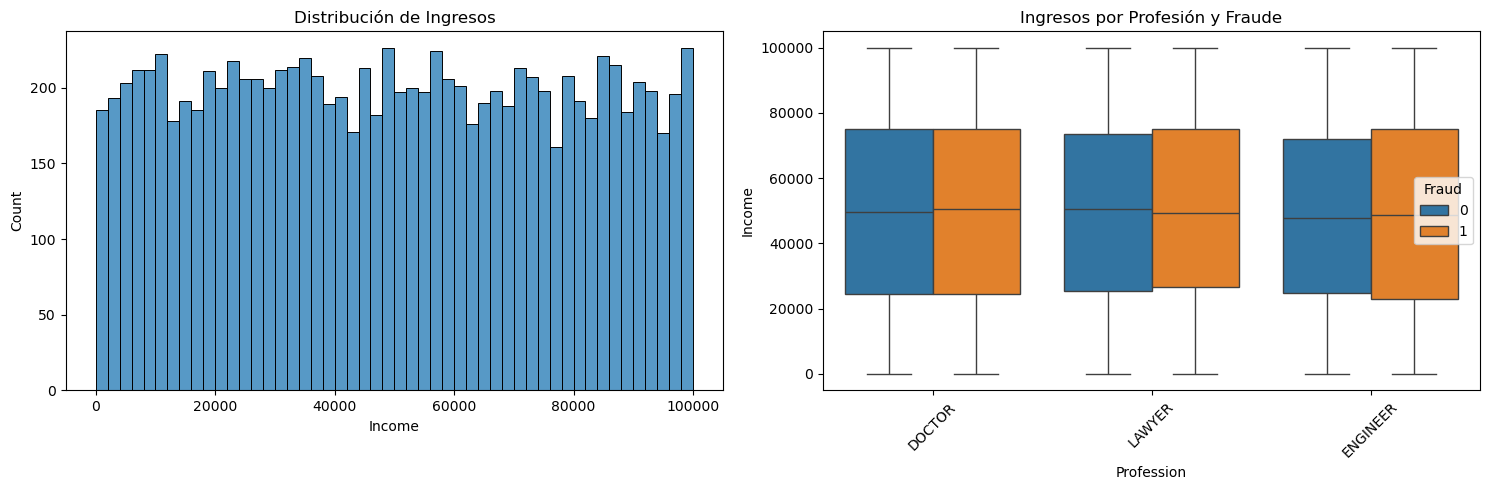

In [17]:
#Analisis de distribucion de ingreesos
plt.figure(figsize=(15, 5))

# Distribución general de ingresos
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Income', bins=50)
plt.title('Distribución de Ingresos')

# Distribución de ingresos por profesión y fraude
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Profession', y='Income', hue='Fraud')
plt.title('Ingresos por Profesión y Fraude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# 3. Estadísticas de Security_code
print("\nEstadísticas de Security Code por status de fraude:")
print(df.groupby('Fraud')['Security_code'].describe())


Estadísticas de Security Code por status de fraude:
        count        mean          std  min     25%    50%    75%     max
Fraud                                                                    
0      4984.0  865.442817  1489.662635  0.0  274.00  533.0  813.0  9960.0
1      5016.0  861.744617  1479.348543  0.0  275.75  546.0  815.0  9990.0



Valores únicos en Profession:
Profession
DOCTOR      3379
LAWYER      3357
ENGINEER    3264
Name: count, dtype: int64
Total valores únicos: 3

Valores únicos en Income:
Income
21212    4
48497    3
99555    3
29063    3
63989    3
Name: count, dtype: int64
Total valores únicos: 9499

Valores únicos en Credit_card_number:
Credit_card_number
3515418493460774    1
5561163042885752    1
5342120228524957    1
30211726221028      1
6011001678278898    1
Name: count, dtype: int64
Total valores únicos: 10000

Valores únicos en Expiry:
Expiry
01/30    111
03/26    107
10/25    106
12/24    103
05/34    102
Name: count, dtype: int64
Total valores únicos: 121

Valores únicos en Security_code:
Security_code
259    20
846    19
421    19
506    18
930    17
Name: count, dtype: int64
Total valores únicos: 1699

Valores únicos en Fraud:
Fraud
1    5016
0    4984
Name: count, dtype: int64
Total valores únicos: 2

Análisis de fechas de vencimiento:


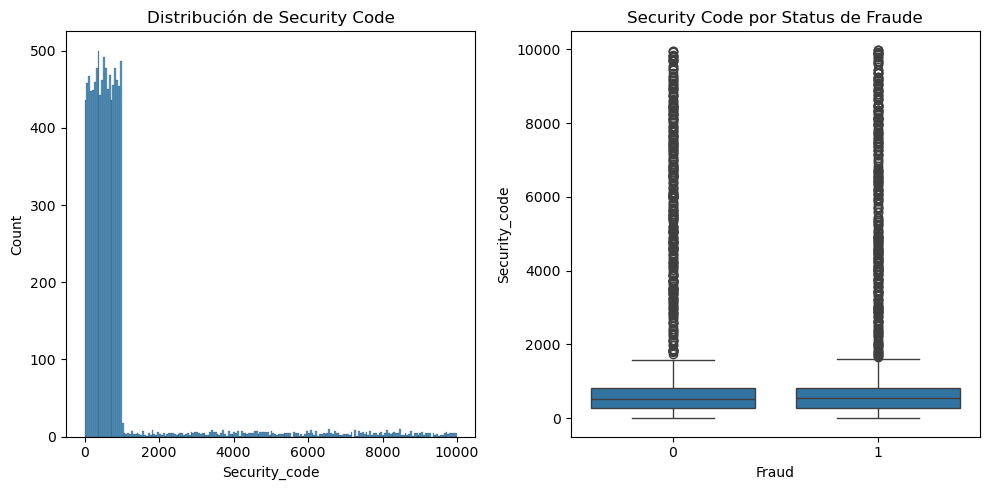


Análisis de números de tarjeta:
Longitud de números de tarjeta:
card_length
16    4979
15    1727
19     851
14     822
13     785
12     777
11      59
Name: count, dtype: int64


In [6]:
# Valores únicos por columna
for column in df.columns:
    print(f"\nValores únicos en {column}:")
    print(df[column].value_counts().head())
    print(f"Total valores únicos: {df[column].nunique()}")

# Análisis de Expiry
print("\nAnálisis de fechas de vencimiento:")
df['Expiry'].value_counts().head(10)

# Análisis de Security_code
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Security_code')
plt.title('Distribución de Security Code')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fraud', y='Security_code', data=df)
plt.title('Security Code por Status de Fraude')
plt.tight_layout()
plt.show()

# Análisis de Credit_card_number
print("\nAnálisis de números de tarjeta:")
# Longitud de los números de tarjeta
df['card_length'] = df['Credit_card_number'].astype(str).str.len()
print("Longitud de números de tarjeta:")
print(df['card_length'].value_counts())

In [21]:
df.head(3)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,card_length
0,DOCTOR,42509,3515418493460774,07/25,251,1,16
1,DOCTOR,80334,213134223583196,05/32,858,1,15
2,LAWYER,91552,4869615013764888,03/30,755,1,16


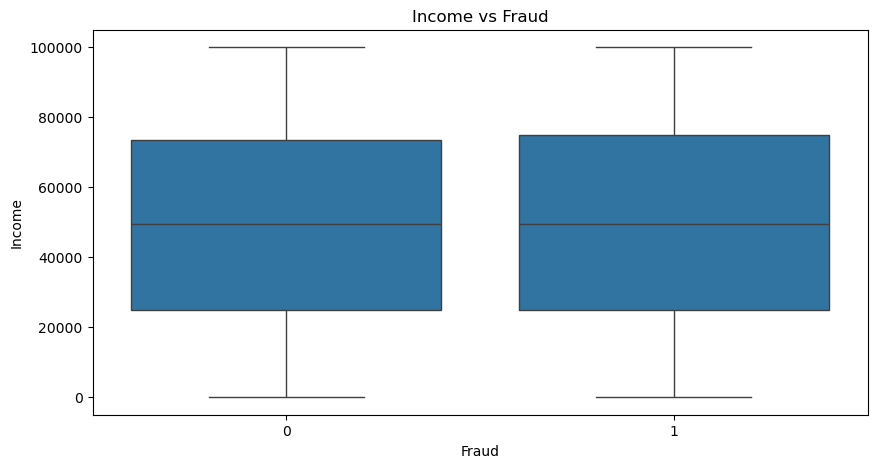

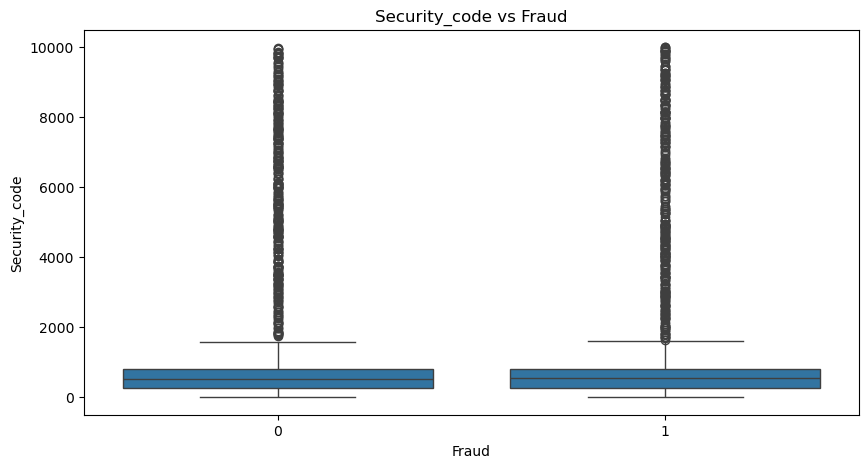

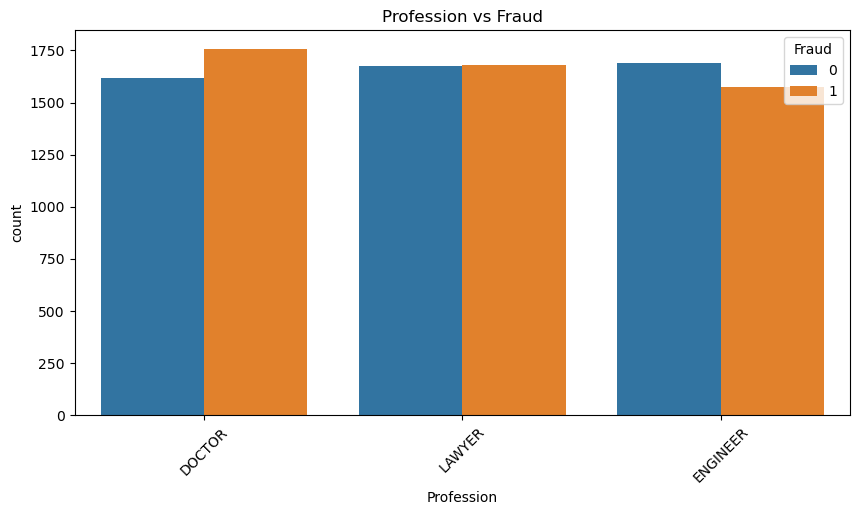

In [22]:
# Para variables numéricas
numeric_cols = ['Income', 'Security_code']
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Fraud', y=col, data=df)
    plt.title(f'{col} vs Fraud')
    plt.show()

# Para variables categóricas
cat_cols = ['Profession']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='Fraud')
    plt.title(f'{col} vs Fraud')
    plt.xticks(rotation=45)
    plt.show()

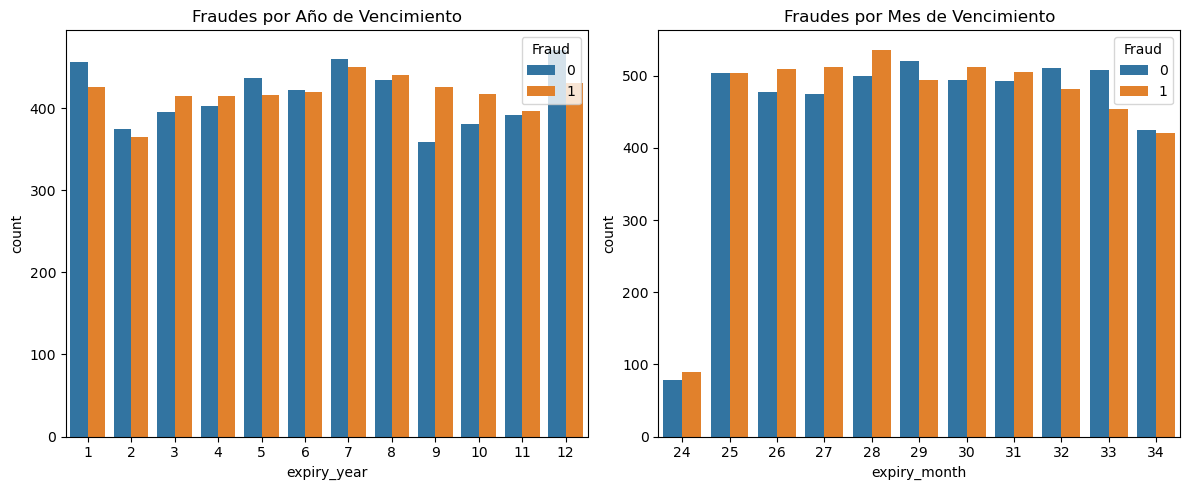

In [7]:
# Extraer información de la fecha de vencimiento
df['expiry_year'] = df['Expiry'].str[:2].astype(int)
df['expiry_month'] = df['Expiry'].str[3:].astype(int)

# Análisis de patrones temporales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='expiry_year', hue='Fraud')
plt.title('Fraudes por Año de Vencimiento')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='expiry_month', hue='Fraud')
plt.title('Fraudes por Mes de Vencimiento')
plt.tight_layout()
plt.show()

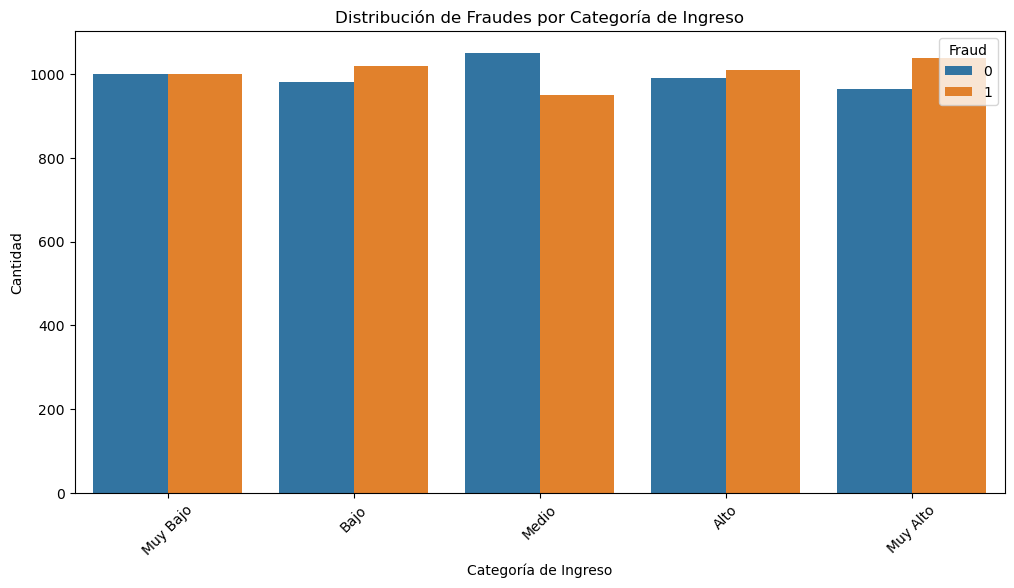

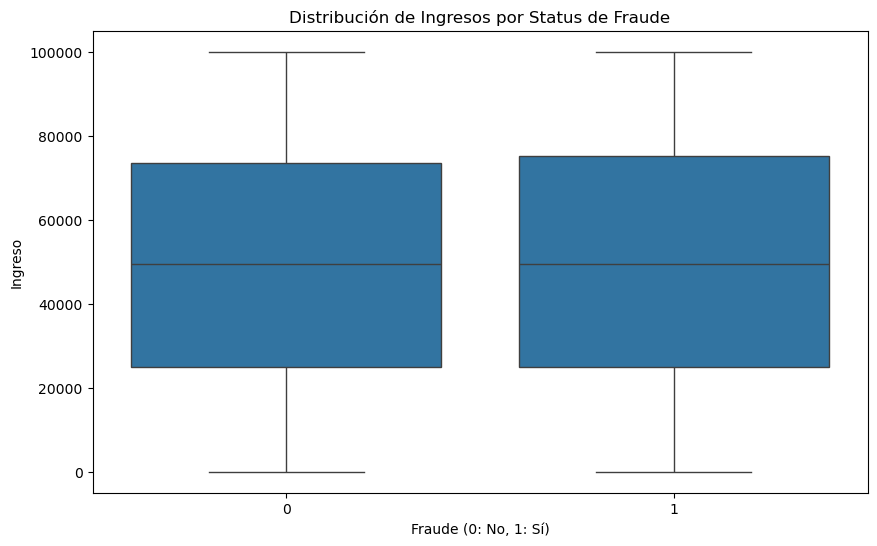

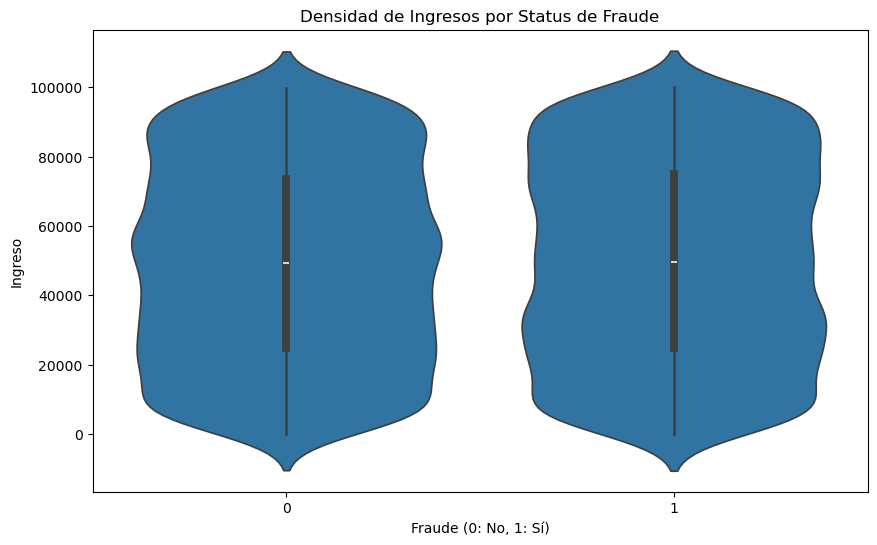


Estadísticas de Ingresos por Status de Fraude:
        count          mean           std  min       25%      50%       75%  \
Fraud                                                                         
0      4984.0  49548.181380  28603.504461  6.0  24869.00  49469.5  73581.00   
1      5016.0  49972.871611  29069.896090  1.0  24849.25  49557.5  75047.75   

           max  
Fraud           
0      99936.0  
1      99986.0  


In [24]:
# 1. Crear categorías de ingresos para mejor visualización
df['income_category'] = pd.qcut(df['Income'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Gráfico de barras para ver la distribución de fraudes por categoría de ingreso
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='income_category', hue='Fraud')
plt.title('Distribución de Fraudes por Categoría de Ingreso')
plt.xlabel('Categoría de Ingreso')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# 2. Boxplot para ver la distribución de ingresos según fraude
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fraud', y='Income')
plt.title('Distribución de Ingresos por Status de Fraude')
plt.xlabel('Fraude (0: No, 1: Sí)')
plt.ylabel('Ingreso')
plt.show()

# 3. Violinplot para ver la densidad de la distribución
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Fraud', y='Income')
plt.title('Densidad de Ingresos por Status de Fraude')
plt.xlabel('Fraude (0: No, 1: Sí)')
plt.ylabel('Ingreso')
plt.show()

# 4. Tabla de estadísticas
print("\nEstadísticas de Ingresos por Status de Fraude:")
print(df.groupby('Fraud')['Income'].describe())

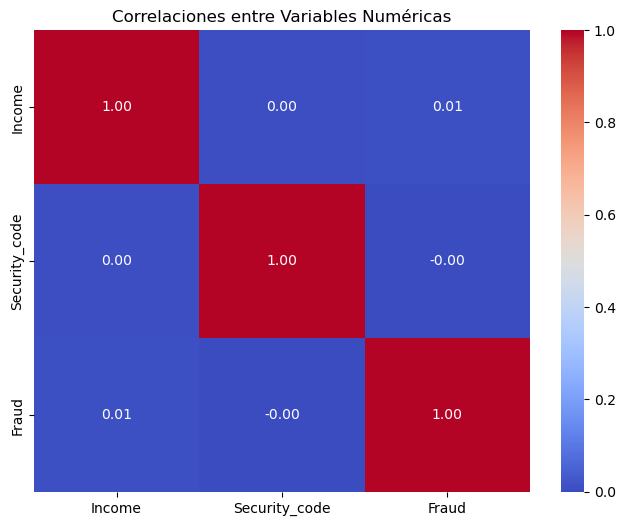

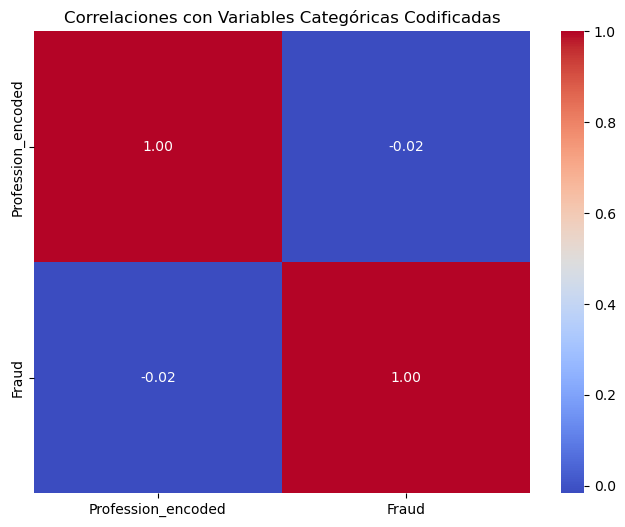

In [8]:
# Variables numéricas
numeric_df = df[['Income', 'Security_code', 'Fraud']]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones entre Variables Numéricas')
plt.show()

# Variables categóricas (usando codificación)
from sklearn.preprocessing import LabelEncoder

categorical_df = df[['Profession', 'Fraud']].copy()
le = LabelEncoder()
categorical_df['Profession_encoded'] = le.fit_transform(categorical_df['Profession'])

# Correlación de variables categóricas codificadas
plt.figure(figsize=(8, 6))
sns.heatmap(categorical_df[['Profession_encoded', 'Fraud']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones con Variables Categóricas Codificadas')
plt.show()

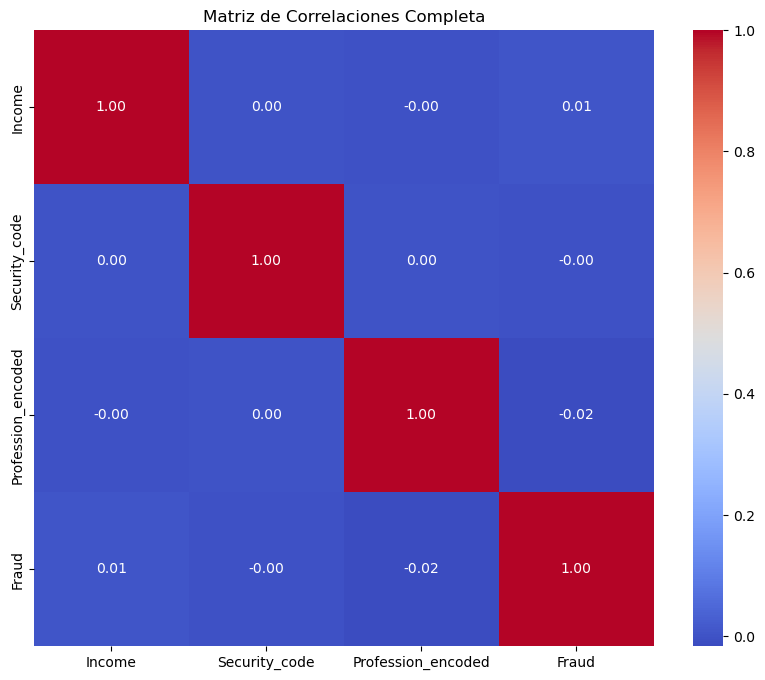


Codificación de Profesiones:
DOCTOR: 0
ENGINEER: 1
LAWYER: 2


In [9]:
# Crear dataset con todas las variables
full_df = df.copy()
full_df['Profession_encoded'] = le.fit_transform(full_df['Profession'])

# Seleccionar columnas relevantes
analysis_df = full_df[['Income', 'Security_code', 'Profession_encoded', 'Fraud']]

plt.figure(figsize=(10, 8))
sns.heatmap(analysis_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaciones Completa')
plt.show()

# Mostrar la codificación de profesiones para referencia
print("\nCodificación de Profesiones:")
for i, profession in enumerate(le.classes_):
    print(f"{profession}: {i}")

In [11]:
# Crear rangos de ingresos
df['income_category'] = pd.qcut(df['Income'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Ratio de ingreso respecto a la media por profesión
df['income_to_profession_mean'] = df['Income'] / df.groupby('Profession')['Income'].transform('mean')

# Flag para ingresos inusuales (outliers)
df['unusual_income'] = (np.abs(df['Income'] - df['Income'].mean()) > (2 * df['Income'].std())).astype(int)

df.head(5)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,card_length,expiry_year,expiry_month,income_category,income_to_profession_mean,unusual_income
0,DOCTOR,42509,3515418493460774,07/25,251,1,16,7,25,Medio,0.846762,0
1,DOCTOR,80334,213134223583196,05/32,858,1,15,5,32,Muy Alto,1.600221,0
2,LAWYER,91552,4869615013764888,03/30,755,1,16,3,30,Muy Alto,1.828693,0
3,LAWYER,43623,341063356109385,01/29,160,1,15,1,29,Medio,0.871342,0
4,DOCTOR,22962,4707418777543978402,11/30,102,0,19,11,30,Bajo,0.457394,0


In [13]:
# Extraer componentes de fecha
df['expiry_year'] = df['Expiry'].str[:2].astype(int)
df['expiry_month'] = df['Expiry'].str[3:].astype(int)

# Tiempo hasta vencimiento (en meses)
from datetime import datetime
current_year = datetime.now().year % 100
current_month = datetime.now().month

df['months_to_expire'] = ((df['expiry_year'] - current_year) * 12 +  df['expiry_month'] - current_month)

# Flag para tarjetas próximas a vencer (menos de 6 meses)
df['near_expiry'] = (df['months_to_expire'] <= 6).astype(int)
df.head(5)

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,card_length,expiry_year,expiry_month,income_category,income_to_profession_mean,unusual_income,months_to_expire,near_expiry
0,DOCTOR,42509,3515418493460774,07/25,251,1,16,7,25,Medio,0.846762,0,-192,1
1,DOCTOR,80334,213134223583196,05/32,858,1,15,5,32,Muy Alto,1.600221,0,-209,1
2,LAWYER,91552,4869615013764888,03/30,755,1,16,3,30,Muy Alto,1.828693,0,-235,1
3,LAWYER,43623,341063356109385,01/29,160,1,15,1,29,Medio,0.871342,0,-260,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0,19,11,30,Bajo,0.457394,0,-139,1


In [ ]:
def fix_expiry_year(year):
    """
    Ajusta el año de vencimiento considerando:
    - Año actual: 2025
    - Rango de vencimiento: 2-4 años
    - Rango válido: 2025-2029
    """
    year_full = 2000 + year
    current_year = 2025
    
    # Validar que el año esté en un rango razonable
    if year_full < current_year or year_full > (current_year + 4):
        print(f"Advertencia: Año {year_full} fuera del rango esperado {current_year}-{current_year + 4}")
    
    return year_full

# Aplicar la función y mostrar la distribución
df['expiry_year_full'] = df['expiry_year'].apply(fix_expiry_year)
current_year_full = 2025
current_month = datetime.now().month

# Calcular meses hasta vencimiento
df['months_to_expire_fixed'] = ((df['expiry_year_full'] - current_year_full) * 12 + 
                               df['expiry_month'] - current_month)

# Mostrar distribución de años de vencimiento
print("\nDistribución de años de vencimiento:")
print(df['expiry_year_full'].value_counts().sort_index())

1. Distribución de tarjetas por año de vencimiento:
expiry_year_full
2001    882
2002    740
2003    810
2004    818
2005    852
2006    842
2007    910
2008    874
2009    785
2010    798
2011    788
2012    901
Name: count, dtype: int64


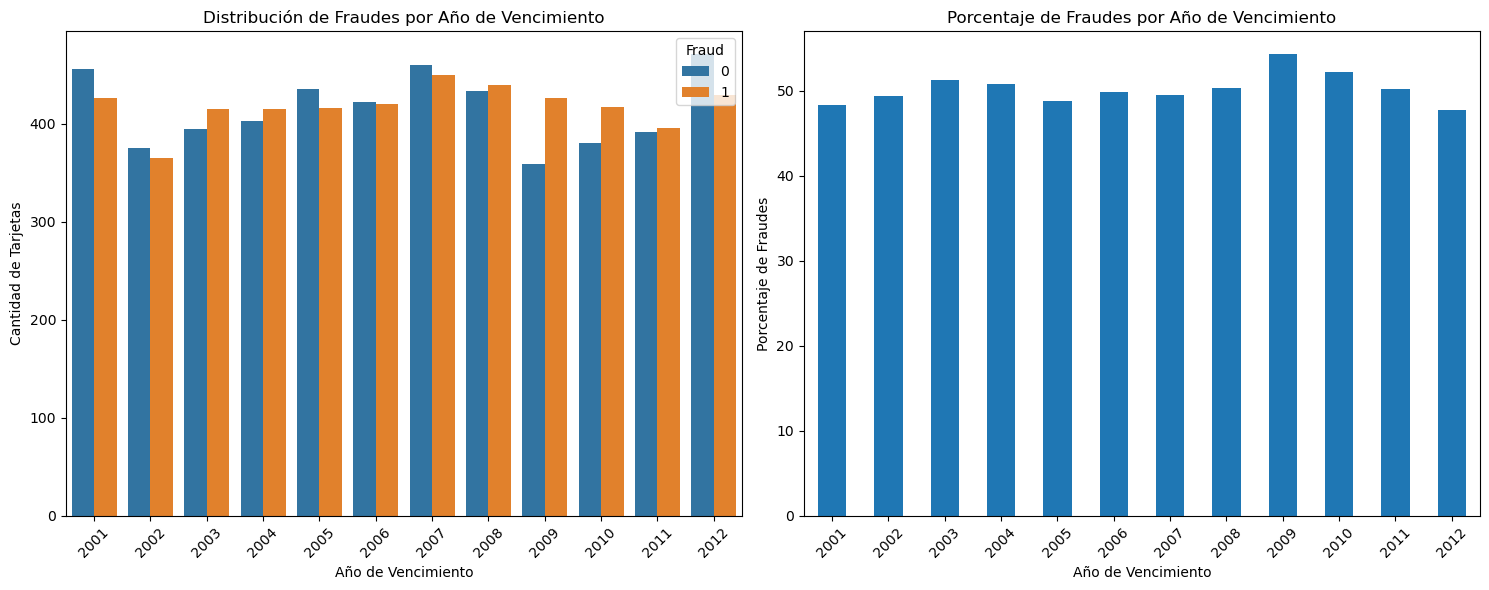


2. Estadísticas por año de vencimiento:
                 Fraud          Income Security_code
                 count  mean      mean         count
expiry_year_full                                    
2001               882  0.48  49131.62           882
2002               740  0.49  50226.51           740
2003               810  0.51  51181.53           810
2004               818  0.51  50345.43           818
2005               852  0.49  49801.16           852
2006               842  0.50  47953.05           842
2007               910  0.49  50123.42           910
2008               874  0.50  49888.03           874
2009               785  0.54  48281.52           785
2010               798  0.52  50949.84           798
2011               788  0.50  49321.11           788
2012               901  0.48  49972.53           901

3. Resumen de tarjetas válidas vs inválidas:
Total de tarjetas: 10000
Tarjetas en rango válido: 0
Tarjetas fuera de rango: 10000


In [15]:
# 1. Análisis del rango de fechas
print("1. Distribución de tarjetas por año de vencimiento:")
year_counts = df['expiry_year_full'].value_counts().sort_index()
print(year_counts)

# 2. Crear visualización
plt.figure(figsize=(15, 6))

# Gráfico de distribución por año
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='expiry_year_full', hue='Fraud')
plt.title('Distribución de Fraudes por Año de Vencimiento')
plt.xlabel('Año de Vencimiento')
plt.ylabel('Cantidad de Tarjetas')
plt.xticks(rotation=45)

# Gráfico de proporción de fraudes
plt.subplot(1, 2, 2)
fraud_prop = df.groupby('expiry_year_full')['Fraud'].mean() * 100
fraud_prop.plot(kind='bar')
plt.title('Porcentaje de Fraudes por Año de Vencimiento')
plt.xlabel('Año de Vencimiento')
plt.ylabel('Porcentaje de Fraudes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Estadísticas detalladas
print("\n2. Estadísticas por año de vencimiento:")
stats_by_year = df.groupby('expiry_year_full').agg({
    'Fraud': ['count', 'mean'],
    'Income': 'mean',
    'Security_code': 'count'
}).round(2)
print(stats_by_year)

# 4. Identificar tarjetas dentro del rango válido
valid_range_mask = (df['expiry_year_full'] >= 2025) & (df['expiry_year_full'] <= 2029)
valid_cards = df[valid_range_mask]

print("\n3. Resumen de tarjetas válidas vs inválidas:")
print(f"Total de tarjetas: {len(df)}")
print(f"Tarjetas en rango válido: {len(valid_cards)}")
print(f"Tarjetas fuera de rango: {len(df) - len(valid_cards)}")